In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime
from datetime import date, timedelta


In [2]:
#import data
parte1 = pd.read_csv("raw_data/parte1.csv", sep=";", encoding='iso-8859-1')
parte2 = pd.read_csv("raw_data/parte2.csv", sep=";", encoding='iso-8859-1')
parte3 = pd.read_csv("raw_data/parte3.csv", sep=";", encoding='iso-8859-1')
parte4 = pd.read_csv("raw_data/parte4.csv", sep=";", encoding='iso-8859-1')

# Data Clean start

In [3]:
#bairro value counts
#parte1[parte1.municipio_fato == "Rio de Janeiro (Capital)"].bairro_fato.value_counts()

In [4]:
parte1.head()

,controle,ano,mes,titulo_do,total_rbft,conteudo,dp,cisp,data_com,data_fato,...,risp,local,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit,idade
0,00787401-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,043a. Pedra de Guaratiba,043a. Pedra de Guaratiba,2009-01-01,2009-01-01,...,RISP 02,Praia,masculino,1992-09-02,parda,Estudante,Ignorado,SANTA CRUZ,RIO DE JANEIRO,16.0
1,00908861-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,119a. Rio Bonito,119a. Rio Bonito,2009-01-01,2008-12-31,...,RISP 04,Via pública,sem informação,1979-06-20,sem informação,Cantor(a),Outra,SERRA DO SAMBE,RIO BONITO,29.0
2,00954561-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,Delegacia de Atendimento à Mulher - Volta Redonda,090a. Barra Mansa,2009-01-01,2009-01-01,...,RISP 05,Via pública,feminino,1966-03-28,parda,Ignorado,Genro,COLÔNIA S. ANTONIO,BARRA MANSA,42.0
3,00987771-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,145a. São João da Barra,145a. São João da Barra,2009-01-01,2009-01-01,...,RISP 06,Via pública,feminino,1988-09-28,branca,Estudante,Outra,TURF CLUB,CAMPOS,20.0
4,00987771-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,145a. São João da Barra,145a. São João da Barra,2009-01-01,2009-01-01,...,RISP 06,Via pública,masculino,1988-09-28,branca,Carteiro(a),Outra,CENTRO,SAO JOAO DA BARRA,20.0


In [5]:
#check dates
parte1["data_fato"] = pd.to_datetime(parte1.data_fato)
parte1[["data_com","data_fato","ano","mes","data_nasc"]].sort_values(by="data_fato")

,data_com,data_fato,ano,mes,data_nasc
100349,2009-06-15,1899-12-30,2009,Junho,1982-09-09
188495,2009-11-13,1950-05-13,2009,Novembro,1900-04-23
177270,2009-10-27,1956-03-20,2009,Outubro,1925-02-01
141610,2009-08-28,1964-04-27,2009,Agosto,1964-04-27
71800,2009-04-26,1977-11-07,2009,Abril,1977-11-07
...,...,...,...,...,...
218254,2009-12-28,2010-01-01,2009,Dezembro,1992-06-13
218250,2009-12-28,2010-01-01,2009,Dezembro,1980-04-15
215963,2009-12-24,2010-01-04,2009,Dezembro,1973-03-07
216585,2009-12-25,2010-01-06,2009,Dezembro,1985-12-21


In [6]:
#condition = parte1.data_fato<pd.to_datetime(2009,1,1)
#parte1[partecondition]
#(parte1.data_fato.dt.date<date(2009,1,1)).sum(), len(parte1)

In [7]:
#drop extra columns from part1
parte1 = parte1.drop(columns=["aisp","risp"])

In [8]:
#merge dataframes
df = pd.concat([parte1,parte2,parte3,parte4])

In [9]:
#check shapes
parte1.shape,parte2.shape,parte3.shape,parte4.shape, df.shape

((220398, 23), (800000, 23), (800000, 23), (701669, 23), (2522067, 23))

In [10]:
(df.municipio_fato == "Rio de Janeiro (Capital)").sum(), df.municipio_fato.count()

(1331186, 2522067)

In [11]:
#select Rio only
Rio_df = (df[df.municipio_fato == "Rio de Janeiro (Capital)"]).reset_index()

In [12]:
#investigate null values
Rio_df.isna().sum()

index                   0
controle                0
ano                     0
mes                     0
titulo_do               0
total_rbft              0
conteudo                0
dp                      3
cisp                    0
data_com                0
data_fato             996
hora_com                0
hora_fato               0
bairro_fato             0
municipio_fato          0
local                   0
sexo                    0
data_nasc         1227647
cor                     0
profissao               0
relacao                 0
bairro_vit              0
municipio_vit           0
idade             1227664
dtype: int64

In [13]:
columns_to_keep = ["controle","titulo_do","total_rbft","data_fato","cisp"]

In [14]:
Rio_df.head(100).bairro_fato.unique()

array(['PRAIA DA BRISA/PEDRA DE GUARAT', 'SANTISSIMO', 'HONÓRIO GURGEL',
       'VASCONCELOS', 'CAMPO GRANDE', 'RICARDO DE ALBUQUERQUE', 'SAÚDE',
       'BARRA DA TIJUCA', 'JACARÉ', 'SÃO CRISTÓVÃO', 'BARRA', 'BENFICA',
       'BANGU', 'COPACABANA', 'LEME', 'CURICICA/JPÁ', 'GUADALUPE',
       'CASCADURA', 'RECREIO DOS BANDEIRANTES', 'DIANA - CAMPO GRANDE',
       'REALENGO', 'CORCUNDINHA', 'FLAMENGO', 'GUARATIBA', 'TIJUCA',
       'TAUÁ', 'BRÁS DE PINA', 'CIDADE DE DEUS', 'SANTA TERESA',
       'BOTAFOGO', 'GUARATIBA - CGRANDE', 'FREGUESIA', 'SANTA CRUZ',
       'COSMOS - CAMPO GRANDE', 'VILA PENHA', 'MANGUARIBA - PACIÊNCIA',
       'CENTRO', 'INHOAÍBA', 'PAVUNA', 'PADRE MIGUEL',
       'JARDIM MARAVILHA/GUARATIBA', 'GAMBOA', 'CIDADE ALTA / CORDOVIL',
       'IPANEMA', 'PRAÇA SECA', 'TAQUARA/JPA', 'JACAREPAGUÁ', 'IRAJA',
       'LEBLON', 'VILA DA PENHA', 'GALEÃO', 'ROCHA', 'MARACANÃ'],
      dtype=object)

In [15]:
Rio_df.bairro_fato[0:100]

0     PRAIA DA BRISA/PEDRA DE GUARAT
1                         SANTISSIMO
2                         SANTISSIMO
3                         SANTISSIMO
4                     HONÓRIO GURGEL
                   ...              
95                            GALEÃO
96                      CAMPO GRANDE
97                             ROCHA
98                          MARACANÃ
99                          MARACANÃ
Name: bairro_fato, Length: 100, dtype: object

In [16]:
unique_id = Rio_df.controle.unique()
len(unique_id)

1302788

In [17]:
Rio_df["data_fato"]=pd.to_datetime(Rio_df.data_fato)

In [18]:
#investigate events pre 2009... choose to remove
pre_2009 = (Rio_df.data_fato.dt.date<date(2009,1,1)).sum()
total = len(Rio_df)
pre_2009, total, pre_2009/total

(2478, 1331186, 0.0018614979424362937)

In [19]:
(Rio_df.data_fato.dt.date<date(2009,1,1)).sum()/len(Rio_df)

0.0018614979424362937

In [20]:
#remove pre-2009
Rio_df1 = Rio_df[Rio_df.data_fato.dt.date>=date(2009,1,1)]

# Bairro Cleaning

In [21]:
Rio_pop = pd.read_csv("raw_data/population_Rio.csv", sep=";", encoding='iso-8859-1')

In [22]:
Rio_pop.loc[0,:]

RegiaoAdministrativa,Ano,Populacao,DensidadeBruta,DensidadeLiquida,TaxaGeometrica    I  Portuaria,2000,39973,"47,0","47,1","1,89%"
Name: 0, dtype: object

# Time Series

In [23]:
Rio_df1.head()

,index,controle,ano,mes,titulo_do,total_rbft,conteudo,dp,cisp,data_com,...,municipio_fato,local,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit,idade
0,0,00787401-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,043a. Pedra de Guaratiba,043a. Pedra de Guaratiba,2009-01-01,...,Rio de Janeiro (Capital),Praia,masculino,1992-09-02,parda,Estudante,Ignorado,SANTA CRUZ,RIO DE JANEIRO,16.0
1,5,01137431-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,...,Rio de Janeiro (Capital),Residência,feminino,1986-02-23,parda,Do lar,Ex-companheiro(a),SANTISSÍMO,RIO DE JANEIRO,22.0
2,6,01137431-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,...,Rio de Janeiro (Capital),Residência,feminino,1989-10-27,parda,Não Possui,Ex-companheiro(a),SANTISSÍMO,RIO DE JANEIRO,19.0
3,7,01137431-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,...,Rio de Janeiro (Capital),Residência,feminino,2008-04-12,branca,sem informação,Ex-companheiro(a),SANTISSÍMO,RIO DE JANEIRO,0.0
5,15,02646521-2009,2009,Janeiro,Lesão corporal dolosa,Não se aplica,vítimas,Delegacia de Atendimento à Mulher - Campo Grande,035a. Campo Grande,2009-01-01,...,Rio de Janeiro (Capital),Residência,feminino,1992-04-22,parda,Do lar,Companheiro(a),SÃO JERONIMO / CAMPO GRANDE,RIO DE JANEIRO,16.0


In [24]:
Rio_df1.data_fato.value_counts()

2012-02-18    1156
2014-03-01    1085
2011-03-05     928
2015-02-14     928
2010-02-13     905
              ... 
2009-06-12     140
2019-12-25     132
2019-12-31     132
2011-12-25     120
2020-01-01       1
Name: data_fato, Length: 4018, dtype: int64

In [25]:
#Rio_df1["data_fato"] = pd.to_datetime(Rio_df.data_fato)

In [26]:
Rio_df1.data_fato

0         2009-01-01
1         2009-01-01
2         2009-01-01
3         2009-01-01
5         2009-01-01
             ...    
1331181   2019-12-29
1331182   2019-12-30
1331183   2019-12-31
1331184   2019-12-30
1331185   2019-12-31
Name: data_fato, Length: 1327712, dtype: datetime64[ns]

In [27]:
Centro_df = Rio_df1[Rio_df1.bairro_fato=="Centro"]

In [28]:
start_date = datetime.date(2009,1,1)
end_date = datetime.date(2019,12,31)

x_dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d')
x_dates

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30'],
              dtype='datetime64[ns]', length=4016, freq='D')

In [29]:
Centro_count = Centro_df.groupby("data_fato").count()["controle"]
Centro_count = Centro_count.reindex(x_dates, fill_value=0)

In [30]:
Centro_count

2009-01-01     0
2009-01-02     0
2009-01-03     0
2009-01-04     0
2009-01-05     0
              ..
2019-12-26    12
2019-12-27    23
2019-12-28    16
2019-12-29     7
2019-12-30    10
Freq: D, Name: controle, Length: 4016, dtype: int64

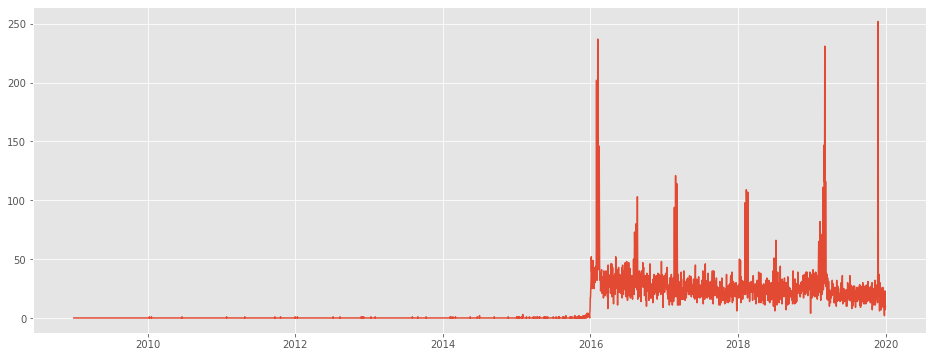

In [31]:
plt.figure(figsize=(16,6))
plt.plot(Centro_count.index, Centro_count)


In [32]:
Centro_pre_2010 = Centro_count[Centro_count.index.map(lambda x: x<datetime.date(2011,1,1))]
Centro_pre_2010.sum()

/var/folders/9s/md4xnzf949vc59xqd_slzxy00000gn/T/ipykernel_28418/3756479710.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  Centro_pre_2010 = Centro_count[Centro_count.index.map(lambda x: x<datetime.date(2011,1,1))]


3

In [33]:
Centro_post_2016 = Centro_count[Centro_count.index.map(lambda x: x>=datetime.date(2016,1,1))]
y = Centro_post_2016

/var/folders/9s/md4xnzf949vc59xqd_slzxy00000gn/T/ipykernel_28418/3249291882.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  Centro_post_2016 = Centro_count[Centro_count.index.map(lambda x: x>=datetime.date(2016,1,1))]


In [34]:
Centro_2016_19 = Centro_post_2016[Centro_post_2016.index.map(lambda x: x<datetime.date(2019,1,1))]
Centro_2019_20 = Centro_post_2016[Centro_post_2016.index.map(lambda x: x>=datetime.date(2019,1,1))]

train = Centro_2016_19
test = Centro_2019_20

/var/folders/9s/md4xnzf949vc59xqd_slzxy00000gn/T/ipykernel_28418/3109375952.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  Centro_2016_19 = Centro_post_2016[Centro_post_2016.index.map(lambda x: x<datetime.date(2019,1,1))]
/var/folders/9s/md4xnzf949vc59xqd_slzxy00000gn/T/ipykernel_28418/3109375952.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  Centro_2019_20 = Centro_post_2016[Centro_post_2016.index.map(lambda x: x>=datetime.date(2019,1,1))]


In [35]:
test

2019-01-01    17
2019-01-02    23
2019-01-03    24
2019-01-04    36
2019-01-05    31
              ..
2019-12-26    12
2019-12-27    23
2019-12-28    16
2019-12-29     7
2019-12-30    10
Freq: D, Name: controle, Length: 364, dtype: int64

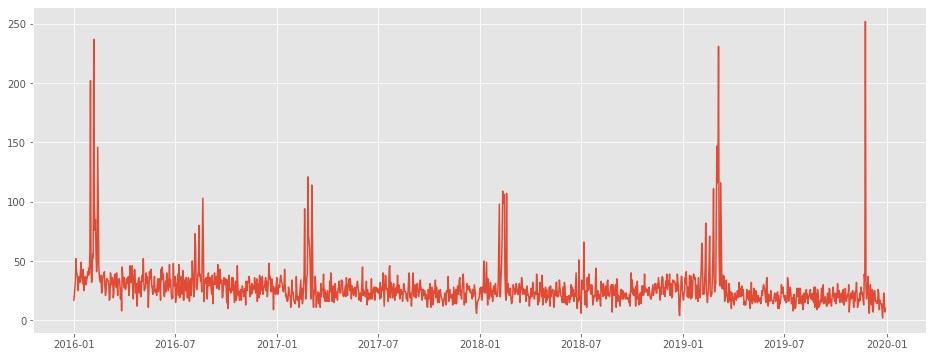

In [36]:
plt.figure(figsize=(16,6))
plt.plot(Centro_post_2016)

In [37]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [38]:
#implies stationarity
print('p-value: ', adfuller(y)[1])

p-value:  3.977086218397791e-10


In [39]:
print('p-value: ', adfuller(y.diff().dropna())[1])

p-value:  1.5632694991428253e-22


In [40]:
y.diff().dropna()

2016-01-02     4.0
2016-01-03     6.0
2016-01-04     7.0
2016-01-05    18.0
2016-01-06   -12.0
              ... 
2019-12-26    10.0
2019-12-27    11.0
2019-12-28    -7.0
2019-12-29    -9.0
2019-12-30     3.0
Freq: D, Name: controle, Length: 1459, dtype: float64

In [41]:
#plot seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_add = seasonal_decompose(y, model="additive")
decomp_mult = seasonal_decompose(y, model="multiplicative")

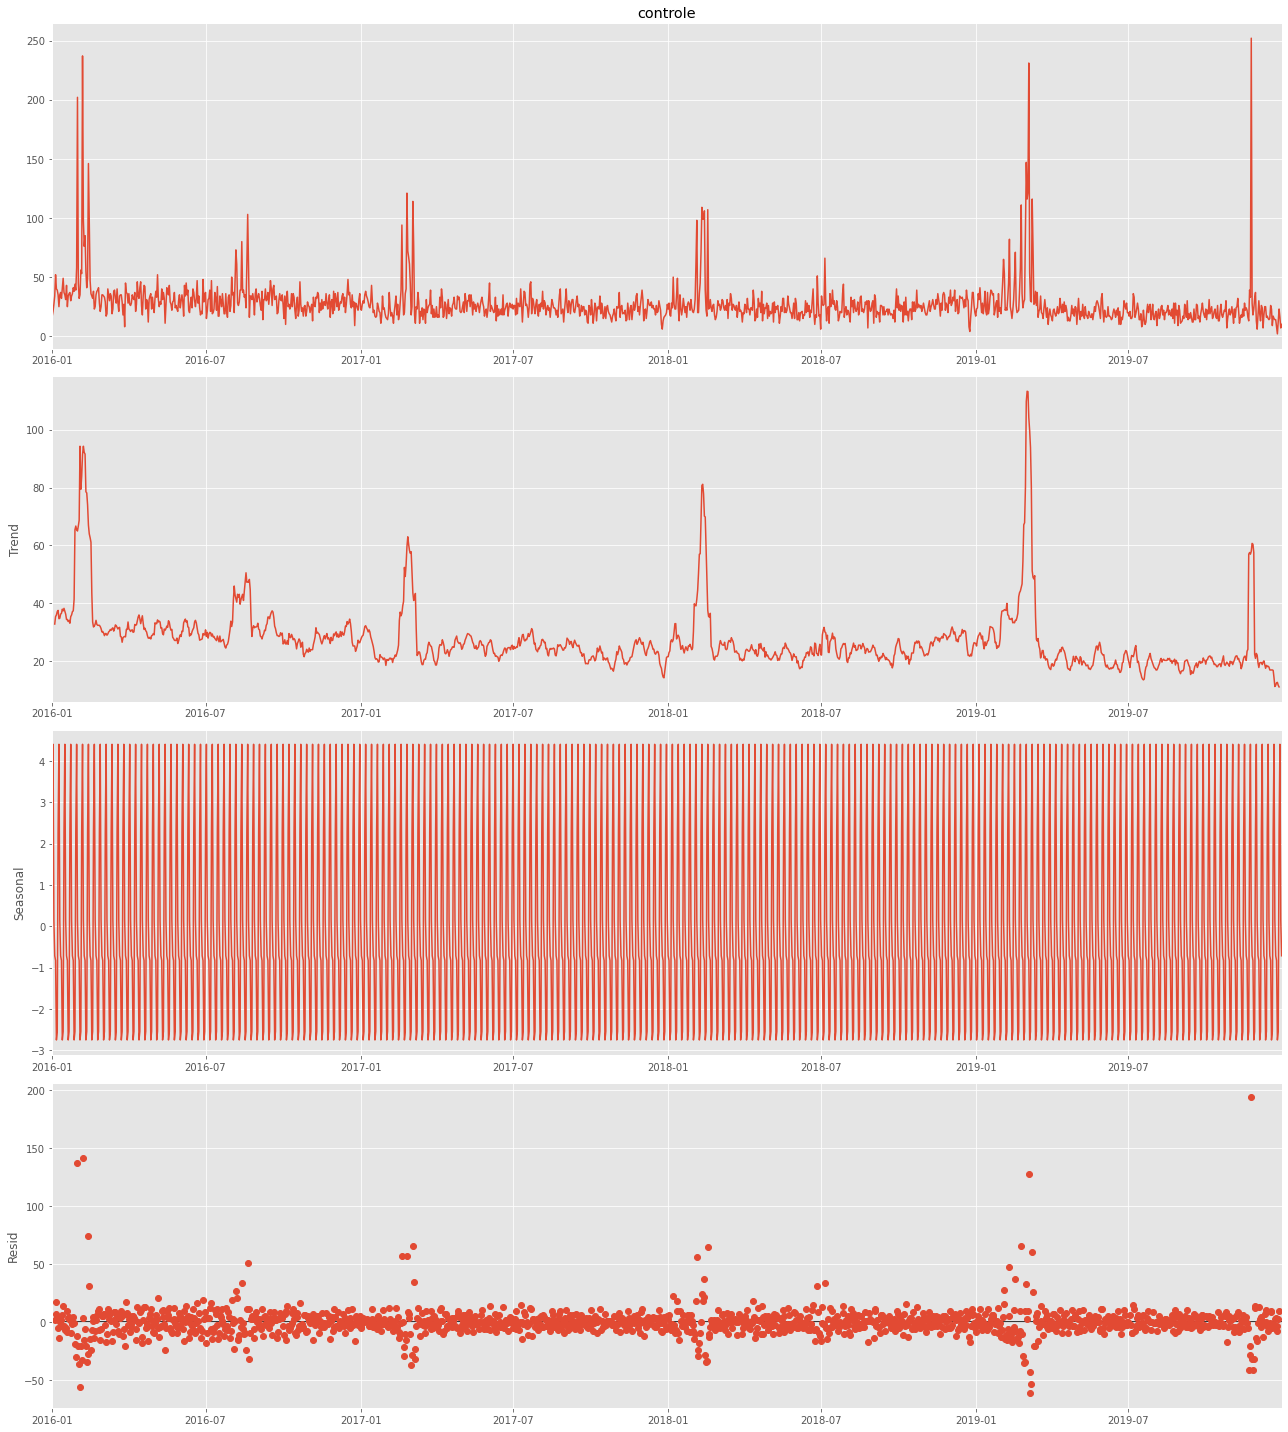

In [42]:
import matplotlib as mpl
with mpl.rc_context():
    mpl.rc("figure", figsize=(18,20))
    decomp_add.plot();


/Users/kavithaapp/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


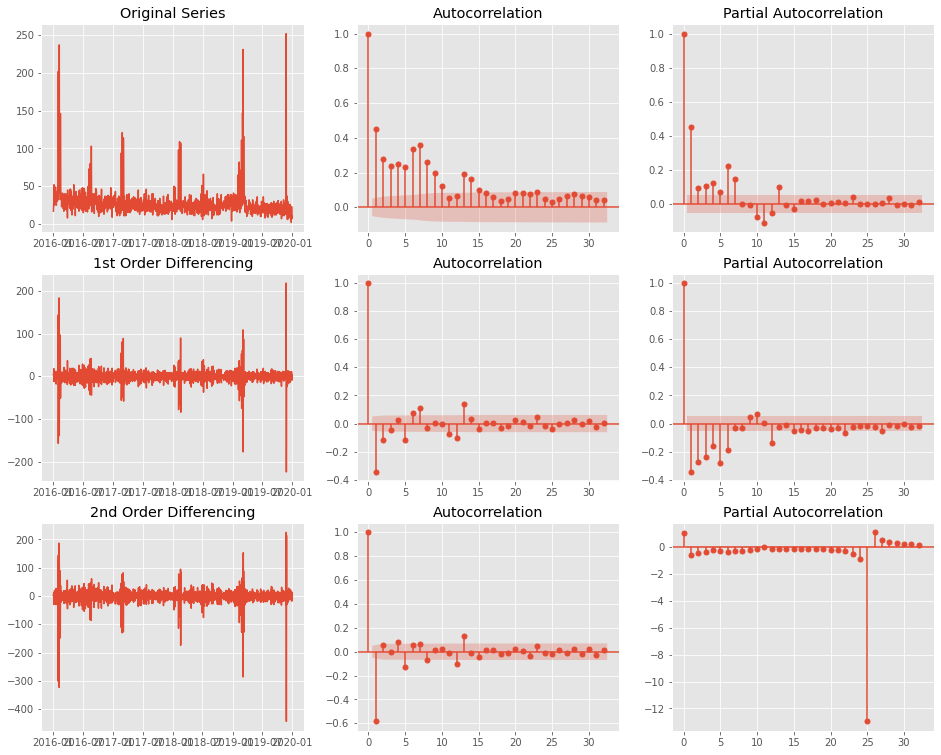

In [43]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize=(16,13))
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1])
plot_pacf(y, ax=axes[0, 2]);

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1])
plot_pacf(y.diff().dropna(), ax=axes[1, 2]);

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(y.diff().diff().dropna(), ax=axes[2, 2]);

plt.show()

In [44]:
'''
from statsmodels.tsa.arima_process import ArmaProcess

#arparams = np.array([.45, -.35]) # beta
#maparams = np.array([.65, .95]) # phi
#ar = np.r_[1, -arparams] 
#ma = np.r_[1, maparams] 

arma_process = ArmaProcess(10, 4)

simulated_data_1=arma_process.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
'''

'\nfrom statsmodels.tsa.arima_process import ArmaProcess\n\n#arparams = np.array([.45, -.35]) # beta\n#maparams = np.array([.65, .95]) # phi\n#ar = np.r_[1, -arparams] \n#ma = np.r_[1, maparams] \n\narma_process = ArmaProcess(10, 4)\n\nsimulated_data_1=arma_process.generate_sample(nsample=1000)\nplt.plot(simulated_data_1)\n'

In [53]:
# Build Model
#arima_d1 = ARIMA(train, order=(6, 1, 2))  
arima_d1 = ARIMA(train, order=(6, 1, 0),freq="D")  

In [54]:
arima_d1 = arima_d1.fit()
arima_d1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95783D+00    |proj g|=  1.49343D-03

At iterate    5    f=  3.95782D+00    |proj g|=  4.12559D-05

At iterate   10    f=  3.95782D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     14      1     0     0   8.882D-08   3.958D+00
  F =   3.9578213105583804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.controle   No. Observations:                 1095
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -4333.814
Method:                       css-mle   S.D. of innovations             12.656
Date:                Tue, 01 Mar 2022   AIC                           8683.629
Time:                        16:53:16   BIC                           8723.617
Sample:                    01-02-2016   HQIC                          8698.760
                         - 12-31-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0042      0.094     -0.045      0.964      -0.187       0.179
ar.L1.D.controle    -0.6705      0.029    -22.738      0.000      -0.728      -0.613
ar.L2.D.controle    -0.6361      0.032    -19.649      0.000      -0.700      -0.573
ar.L3.D.controle    -0.5735      0.035    -16.561      0.000      -0.641      -0.506
ar.L4.D.controle    -0.4931      0.035    -14.230      0.000      -0.561      -0.425
ar.L5.D.controle    -0.5053      0.032    -15.600      0.000      -0.569      -0.442
ar.L6.D.controle    -0.2204      0.029     -7.474      0.000      -0.278      -0.163
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6871           -0.9060j            1.1370           -0.1467
AR.2            0.6871           +0.9060j            1.1370            0.1467
AR.3           -0.3629           -1.1633j            1.2186           -0.2981
AR.4           -0.3629           +1.1633j            1.2186            0.2981
AR.5           -1.4702           -0.4484j            1.5371           -0.4529
AR.6           -1.4702           +0.4484j            1.5371            0.4529
-----------------------------------------------------------------------------
"""

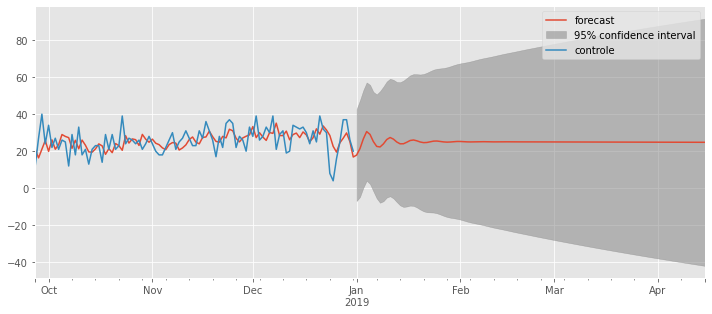

In [55]:
arima_d1.plot_predict(start=1000, end=1200);
fig = plt.gcf(); fig.set_size_inches(12, 5);


In [56]:
forecast, std_err, confidence_int = arima_d1.forecast(len(test), alpha=0.05)  # 95% confidence


In [57]:
# We define here a "Plot forecast vs. real", which also shows historical train set

def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

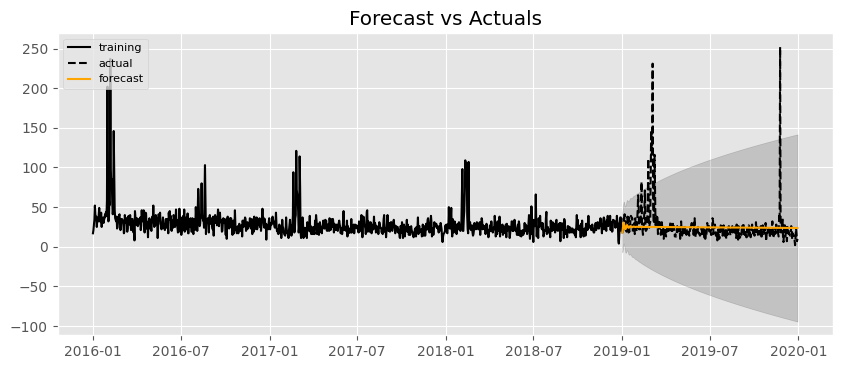

In [58]:
plot_forecast(forecast, train, test, confidence_int[:,0], confidence_int[:,1])

In [59]:
import pmdarima as pm
smodel = pm.auto_arima(train,
                       start_p=1, max_p=6,
                       start_q=1, max_q=2,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8798.882, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9195.708, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9072.105, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8839.129, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9193.708, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8792.923, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8983.222, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8788.832, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8931.063, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8774.497, Time=0.32 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8899.845, Time=0.19 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8695.012, Time=0.40 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8736.079, Time=0.25 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=8685.622, Time=0.69 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept

In [ ]:
'''
arima = ARIMA(train, order=(4, 0, 6))  
arima = arima.fit()
arima.summary()
'''

In [ ]:
'''
from statsmodels.tsa.arima_process import ArmaProcess

arparams = np.array([.55, -.35]) # beta
maparams = np.array([.65, .95]) # phi

ar = np.r_[1, -arparams] 
ma = np.r_[1, maparams] 
arma_process = ArmaProcess(ar, ma)

simulated_data_1=arma_process.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
''';